In [43]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
pd.get_option("display.max_columns",None)
pd.get_option("display.max_rows", None)
import seaborn as sns
from scipy import stats

In [8]:
pre_app = pd.read_csv('credit_previous_application.csv')

In [9]:
pre_app.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [10]:
pre_app = pre_app.drop(['NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL','SELLERPLACE_AREA','NAME_TYPE_SUITE'],axis = 1)

In [11]:
def column_wise_null_percentage(df):
    output = round(df.isnull().sum()/len(df.index)*100,2)
    return output

NA_col = column_wise_null_percentage(pre_app)
NA_col.shape


(27,)

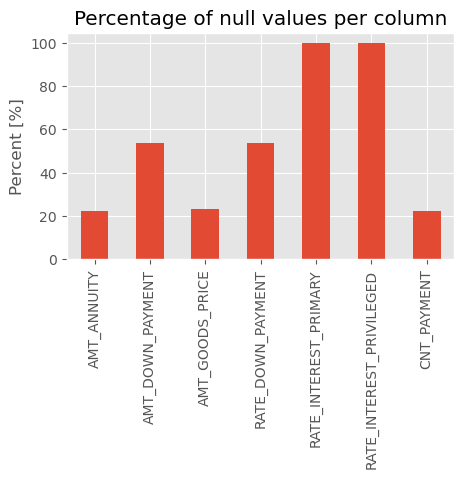

In [23]:
plt.figure(figsize = (5,3),dpi = 100)
NA_col[NA_col > 0].plot(kind = 'bar')
plt.title('Percentage of null values per column')
plt.ylabel('Percent [%]')
plt.show()

In [27]:
pre_app = pre_app.drop(['AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT',
                        'RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIVILEGED'],axis = 1)

In [28]:
pre_app.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_INTEREST_PRIMARY', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT'],
      dtype='object')

In [37]:
columns = ['AMT_ANNUITY',\
           'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',\
           'HOUR_APPR_PROCESS_START',\
           'RATE_INTEREST_PRIMARY',\
           'DAYS_DECISION',\
           'CNT_PAYMENT']

pre_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_INTEREST_PRIMARY,DAYS_DECISION,CNT_PAYMENT
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,1.284699e+06,1.670214e+06,1.670214e+06,5951.000000,1.670214e+06,1.297984e+06
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,2.278473e+05,1.248418e+01,9.964675e-01,0.188357,-8.806797e+02,1.605408e+01
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,3.153966e+05,3.334028e+00,5.932963e-02,0.087671,7.790997e+02,1.456729e+01
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.034781,-2.922000e+03,0.000000e+00
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,5.084100e+04,1.000000e+01,1.000000e+00,0.160716,-1.300000e+03,6.000000e+00
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,1.200000e+01,1.000000e+00,0.189122,-5.810000e+02,1.200000e+01
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,2.340000e+05,1.500000e+01,1.000000e+00,0.193330,-2.800000e+02,2.400000e+01
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,-1.000000e+00,8.400000e+01


In [47]:
filter_df = pre_app[['AMT_ANNUITY']]
z = np.abs(stats.zscore(filter_df))
outliers_annuity = np.where(z > 2)


filter_df = pre_app[['AMT_APPLICATION']]
z = np.abs(stats.zscore(filter_df))
outliers_app = np.where(z > 2)


filter_df = pre_app[['AMT_CREDIT']]
z = np.abs(stats.zscore(filter_df))
outliers_credit = np.where(z > 2)


filter_df = pre_app[['AMT_GOODS_PRICE']]
z = np.abs(stats.zscore(filter_df))
outliers_goods = np.where(z > 2)

comb_outliers = np.unique(np.concatenate((outliers_annuity[0], outliers_app[0],outliers_credit[0],\
                                          outliers_goods[0]), axis =0),0)

pre_app_filter = pre_app.drop(pre_app.index[comb_outliers],axis = 0)


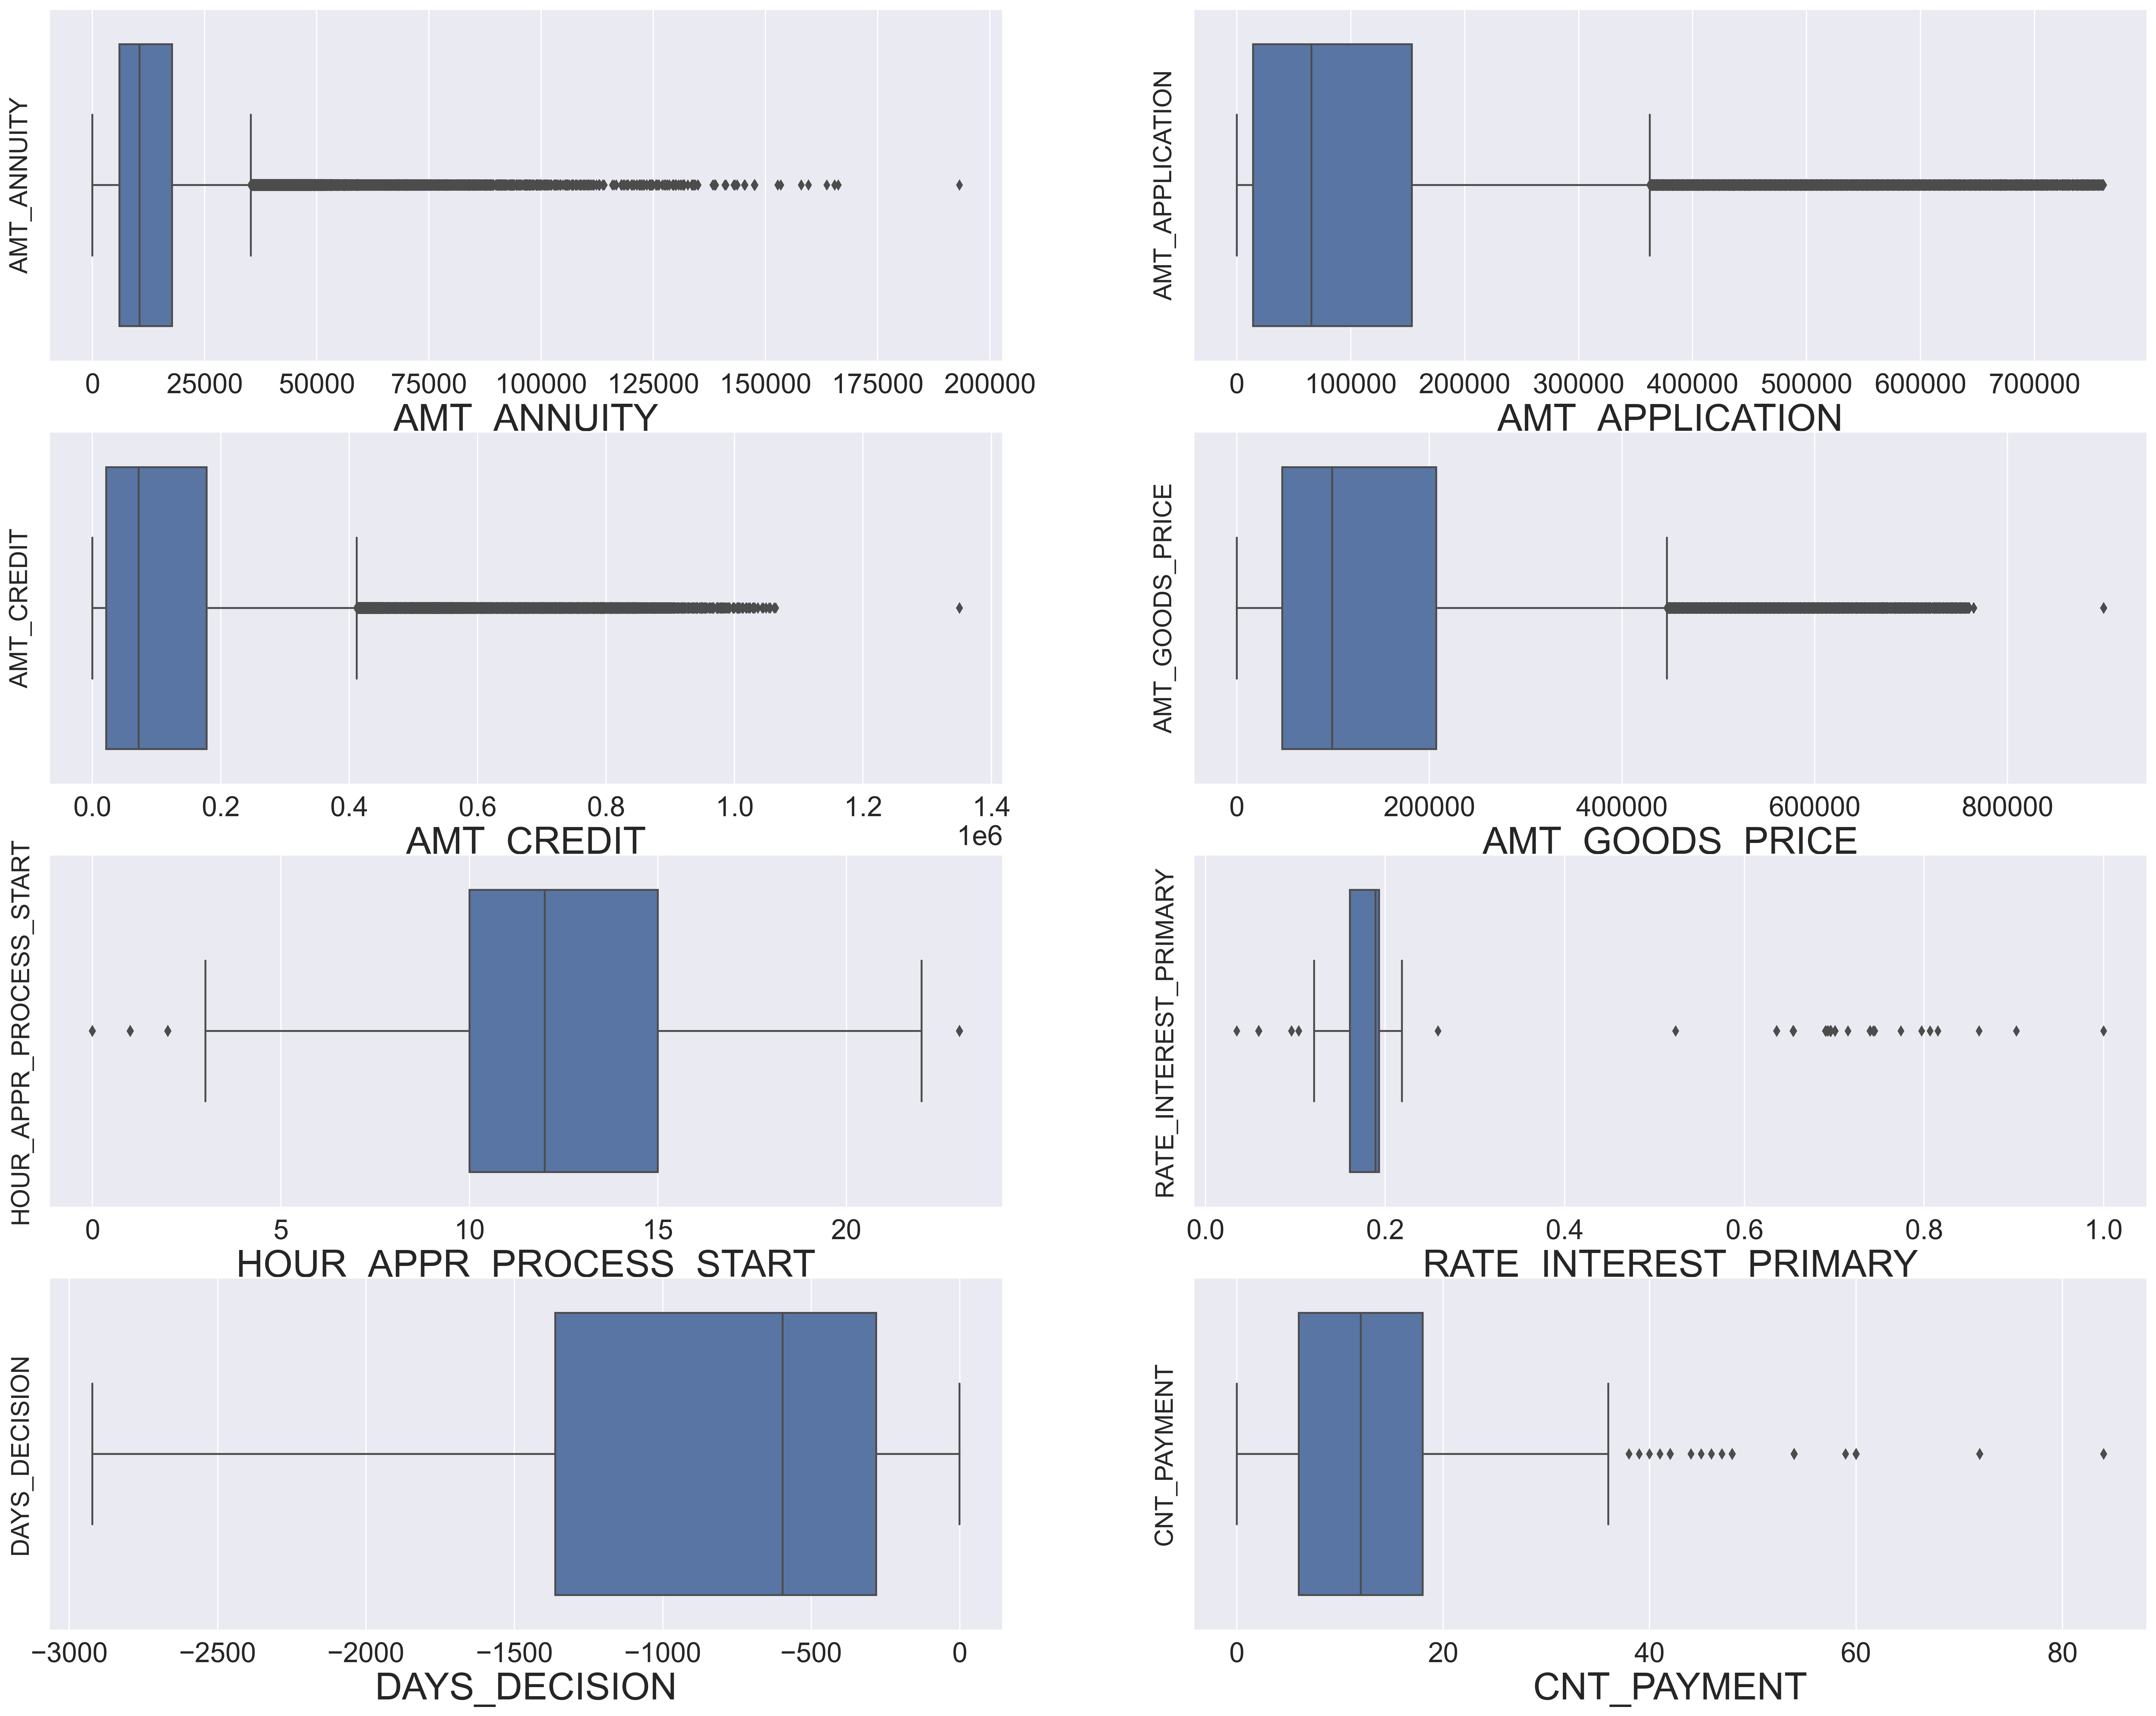

In [49]:
plt.figure(figsize = (30,30), dpi = 300)
sns.set(font_scale = 2)
for i in enumerate(columns):
    plt.subplot(5,2,i[0]+1)
    b = sns.boxplot(x = i[1], data = pre_app_filter)
    b.set_ylabel(i[1], fontsize = 20)
    b.set_xlabel(i[1], fontsize = 30)
plt.show()


# Create Income, Credit, and Goods Ranges

In [52]:
print(min(pre_app_filter['AMT_APPLICATION']))
print(max(pre_app_filter['AMT_APPLICATION']))

0.0
760702.5


In [53]:

bins = [0,30000,50000,70000,90000,110000,150000,200000,300000,10000000]

slot = ['<30000', '30000-50000','50000-70000','70000-90000',\
        '90000-110000', '110000-150000', '150000-200000',\
        '200000-300000', '>300000']

pre_app_filter['application_range'] = pd.cut(pre_app_filter['AMT_APPLICATION'],bins,labels = slot)

pre_app_filter['credit_range']=pd.cut(pre_app_filter['AMT_CREDIT'],bins,labels=slot)
pre_app_filter['goods_range'] = pd.cut(pre_app_filter['AMT_GOODS_PRICE'],bins,labels = slot)


# Rename columns for easier use. 

In [57]:
col ={'SK_ID_PREV':'id_pre', 'SK_ID_CURR':'id_curr', 'NAME_CONTRACT_TYPE':'credit_type',\
      'AMT_ANNUITY': 'pre_annuity', \
      'WEEKDAY_APPR_PROCESS_START':'weekday', 'HOUR_APPR_PROCESS_START':'hour',\
      'FLAG_LAST_APPL_PER_CONTRACT':'last_per_contract', 'NFLAG_LAST_APPL_IN_DAY':'last_per_day',\
      'RATE_INTEREST_PRIMARY':'interest', 'NAME_CASH_LOAN_PURPOSE':'cash_purpose',\
      'NAME_CONTRACT_STATUS':'status', 'DAYS_DECISION':'time_decision', 'NAME_PAYMENT_TYPE':'payment_name',\
      'CODE_REJECT_REASON':'reject_reason', 'NAME_CLIENT_TYPE':'client',\
      'NAME_GOODS_CATEGORY':'goods_cat','NAME_PORTFOLIO':'portfolio',\
      'NAME_PRODUCT_TYPE':'product_type', 'CHANNEL_TYPE':'channel_type',\
      'NAME_SELLER_INDUSTRY':'seller', 'CNT_PAYMENT':'cnt_payment',\
      'application_range':'pre_app_range','credit_range':'pre_credit_range',\
      'goods_range':'pre_goods_range'}

In [58]:
pre_app_filter = pre_app_filter.rename(columns = col)

pre_app_filter.columns

Index(['id_pre', 'id_curr', 'credit_type', 'pre_annuity', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'weekday', 'hour', 'last_per_contract',
       'last_per_day', 'interest', 'cash_purpose', 'status', 'time_decision',
       'payment_name', 'reject_reason', 'client', 'goods_cat', 'portfolio',
       'product_type', 'channel_type', 'seller', 'cnt_payment',
       'pre_app_range', 'pre_credit_range', 'pre_goods_range'],
      dtype='object')